# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Fundamentals of estimation

## Example 1, the mean

In [180]:
import numpy as np
def mean_estimator(x): # x is our data
    return np.mean(x)

In [181]:
sample = np.random.normal(size=100)
mean_estimator(sample)

-0.007015696533994885

## Example 2, linear regression

In [182]:
def linear_regression(x,y):
    # Here x,y is our data
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x,y)
    return lambda x1: lr.predict(x1)

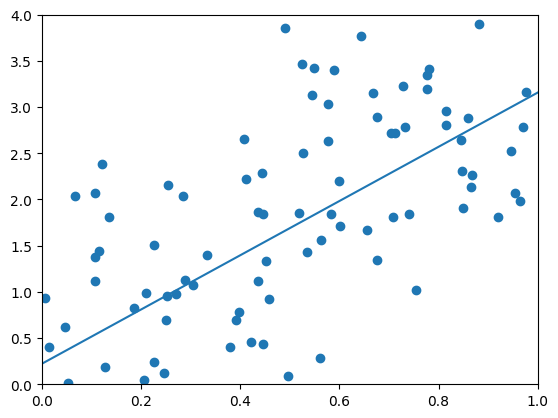

In [183]:
sample_x = np.random.uniform(0,1,size=100).reshape(-1,1)
sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
g_star = linear_regression(sample_x,sample_y)

# Lets plot out function
import matplotlib.pyplot as plt
x_plot = np.linspace(0,1,10)
plt.xlim(0,1)
plt.ylim(0,4)
plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))
plt.scatter(sample_x,sample_y)

In [184]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sample_x ,sample_y )
print(f"intercept: {lr.intercept_}")
print(f"slope: {lr.coef_}")

intercept: 0.22127344992816367
slope: [2.93585437]


(array([ 6., 10., 12.,  7., 12., 15.,  9., 10., 11.,  8.]),
 array([0.00587255, 0.10380113, 0.2017297 , 0.29965828, 0.39758685,
        0.49551543, 0.593444  , 0.69137258, 0.78930115, 0.88722972,
        0.9851583 ]),
 <BarContainer object of 10 artists>)

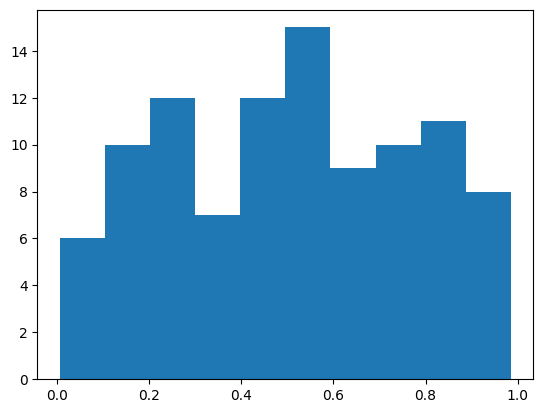

In [185]:
sample_x.flatten().shape
plt.hist(sample_x)

(array([ 2.,  4., 10., 12., 19., 17., 15.,  9.,  5.,  7.]),
 array([-2.40716919, -1.95410772, -1.50104626, -1.04798479, -0.59492333,
        -0.14186187,  0.3111996 ,  0.76426106,  1.21732253,  1.67038399,
         2.12344546]),
 <BarContainer object of 10 artists>)

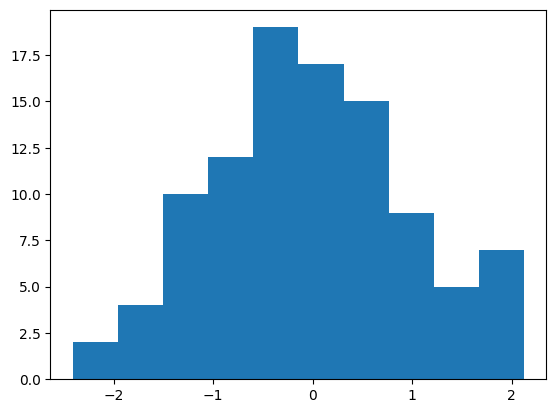

In [186]:
plt.hist(np.random.normal(0,1,size=sample_x.shape[0]))

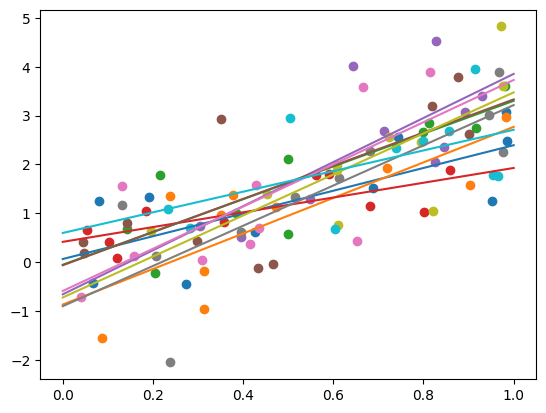

In [187]:
import matplotlib.pyplot as plt
for i in range(10):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    plt.scatter(sample_x,sample_y)
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)))

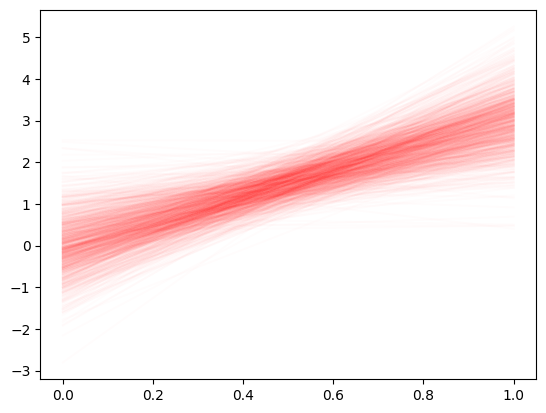

In [188]:
import matplotlib.pyplot as plt
for i in range(1000):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_star = linear_regression(sample_x,sample_y)

    # Lets plot out function
    #plt.scatter(sample_x,sample_y,alpha=0.1,color='blue')
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_star(x_plot.reshape(-1,1)),alpha=0.01,color='red')

## Example, testing error

In [193]:
def gen_data(n_samples):
    sample_x = np.random.uniform(0,1,size=n_samples).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    return sample_x,sample_y

In [196]:
xtrain,ytrain = gen_data(10)
g_star = linear_regression(xtrain,ytrain)

In [197]:
def test_error():
    xtest,ytest = gen_data(100)
    predictions = g_star(xtest)
    residual = ytest-predictions
    return np.mean(residual**2)

In [199]:
test_error()

1.0254893014970259

(array([ 3.,  6., 18., 16., 19., 15., 14.,  5.,  3.,  1.]),
 array([0.74072961, 0.81206493, 0.88340026, 0.95473558, 1.0260709 ,
        1.09740622, 1.16874154, 1.24007686, 1.31141219, 1.38274751,
        1.45408283]),
 <BarContainer object of 10 artists>)

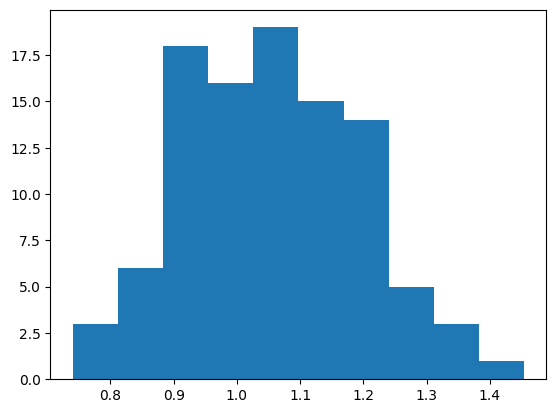

In [198]:
plt.hist([test_error() for i in range(100)])

## Strong law of large numbers

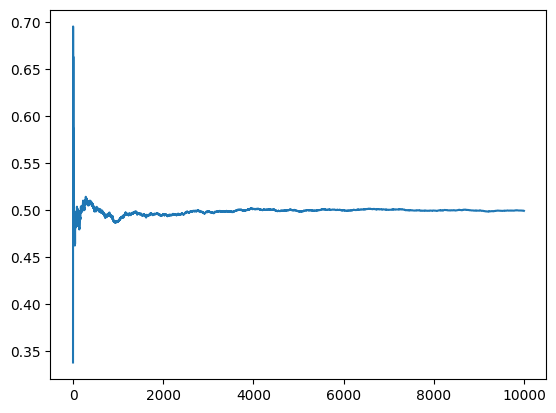

In [200]:
X = np.random.uniform(0,1,size=10000)
mean = np.cumsum(X)/np.arange(1,X.shape[0]+1)
plt.plot(mean)

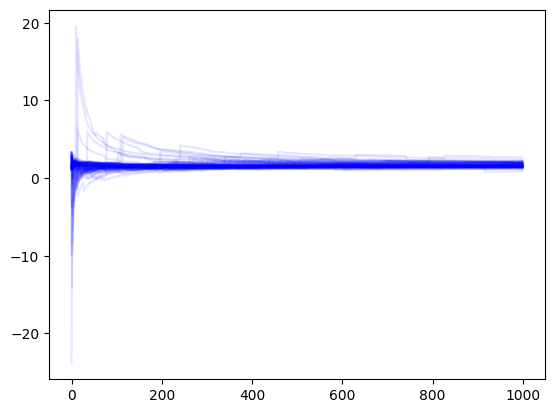

In [202]:
for i in range(100):
    X = np.random.exponential(size=1000)
    Y = np.sin(X)*np.exp(X)/X
    mean = np.cumsum(Y)/np.arange(1,Y.shape[0]+1)
    plt.plot(mean,color='blue',alpha=0.1)

## Convergence in distribution

### The $Gaussian(\mu, \sigma^2)$ or $Normal(\mu, \sigma^2)$ RV?

The probability density function (PDF) $f(x)$ is given by

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

下面的function 和normal distribution 的公式差一點點

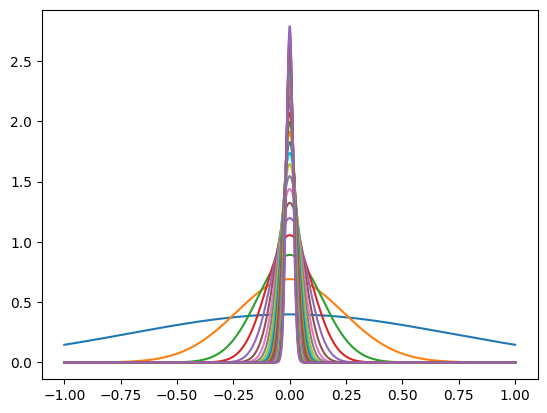

In [ ]:
for  i in range(1,50,2):
    x = np.linspace(-1,1,1000)
    sigma = 1/i
    plt.plot(x,(1/np.sqrt(2*sigma*np.pi))*np.exp(-x**2/sigma**2))